# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | guymon
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | mahina
Processing Record 12 of Set 1 | orapa
Processing Record 13 of Set 1 | thinadhoo
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | porbandar
Processing Record 16 of Set 1 | uthal
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | rikaze
Processing Record 19 of Set 1 | ataq
Processing Record 20 of Set 1 | tosontsengel
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | bayana

In [5]:
# To help me find the various tags in the json file
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.5, 'lon': 13.2667},
 'dt': 1687482135,
 'id': 2220309,
 'main': {'feels_like': 297.84,
          'grnd_level': 973,
          'humidity': 22,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 298.66,
          'temp_max': 298.66,
          'temp_min': 298.66},
 'name': 'Idrī',
 'sys': {'country': 'LY', 'sunrise': 1687493559, 'sunset': 1687543521},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 64, 'gust': 6.09, 'speed': 4.61}}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,283.56,96,100,7.42,AU,1687481846
1,yellowknife,62.4560,-114.3525,294.44,32,20,5.66,CA,1687481786
2,puerto ayora,-0.7393,-90.3518,297.90,91,96,3.13,EC,1687481847
3,papatowai,-46.5619,169.4708,284.23,84,100,2.63,NZ,1687481847
4,guymon,36.6828,-101.4816,296.15,73,0,5.14,US,1687481847


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,283.56,96,100,7.42,AU,1687481846
1,yellowknife,62.4560,-114.3525,294.44,32,20,5.66,CA,1687481786
2,puerto ayora,-0.7393,-90.3518,297.90,91,96,3.13,EC,1687481847
3,papatowai,-46.5619,169.4708,284.23,84,100,2.63,NZ,1687481847
4,guymon,36.6828,-101.4816,296.15,73,0,5.14,US,1687481847


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

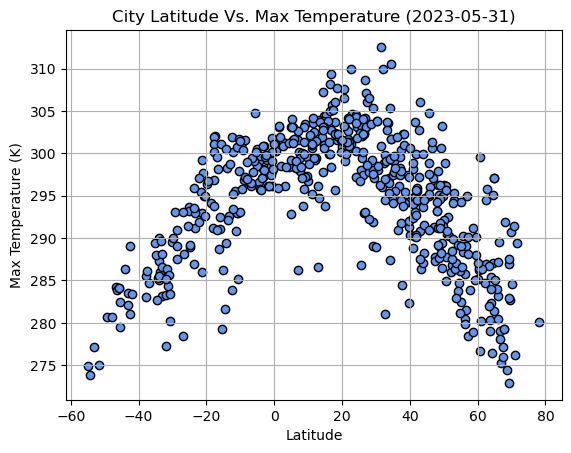

In [44]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
tmp = city_data_df["Max Temp"]

plt.scatter(lat, tmp, color="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (2023-05-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

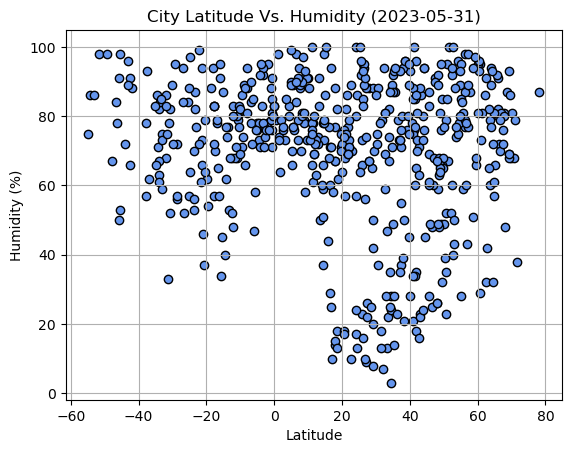

In [11]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
hmd = city_data_df["Humidity"]

plt.scatter(lat, hmd, color="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (2023-05-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

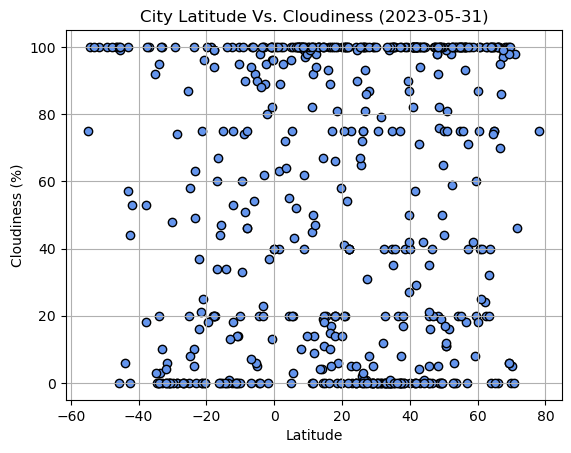

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cld = city_data_df["Cloudiness"]

plt.scatter(lat, cld, color="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (2023-05-31)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

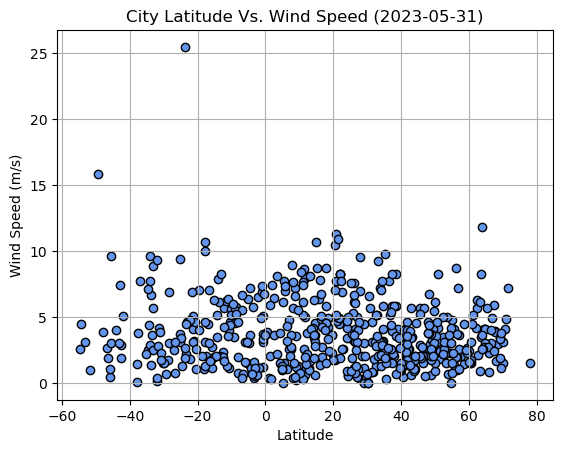

In [14]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wnd = city_data_df["Wind Speed"]

plt.scatter(lat, wnd, color="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (2023-05-31)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots

def plot_linregress(x_val, y_val, label, N_vs_S, anno_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regression_line = (slope * x_val) + intercept
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = rvalue * rvalue
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regression_line, color = "red")
    plt.annotate(equation, xy=(anno_loc), color="darkred")
    plt.title(f"Latitude vs {N_vs_S}ern Hemisphere {label}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{label}")
    print(f"r-squared: {r_squared}")
    plt.savefig(f"../output_data/{N_vs_S}ern_Hemisphere_Lat_vs_{label}.png")
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,294.44,32,20,5.66,CA,1687481786
4,guymon,36.6828,-101.4816,296.15,73,0,5.14,US,1687481847
6,stanley,54.8680,-1.6985,286.35,89,75,0.00,GB,1687481848
7,keflavik,64.0049,-22.5624,285.39,94,100,11.83,IS,1687481849
9,longyearbyen,78.2186,15.6401,280.06,87,75,1.54,SJ,1687481611


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,283.56,96,100,7.42,AU,1687481846
2,puerto ayora,-0.7393,-90.3518,297.90,91,96,3.13,EC,1687481847
3,papatowai,-46.5619,169.4708,284.23,84,100,2.63,NZ,1687481847
5,margaret river,-33.9500,115.0667,285.01,63,95,9.63,AU,1687481848
8,port elizabeth,-33.9180,25.5701,287.31,82,0,7.72,ZA,1687481849


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.5256137613705608


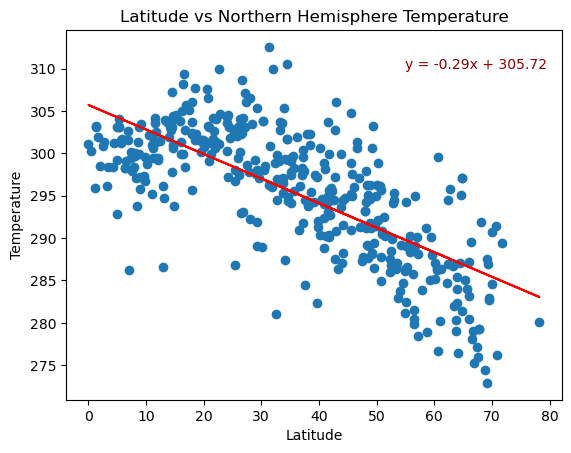

In [33]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

north_lat.reset_index(drop=True, inplace=True)
north_temp.reset_index(drop=True, inplace=True)

plot_linregress(north_lat, north_temp, "Temperature", "North", (55, 310))

r-squared: 0.6714698979354228


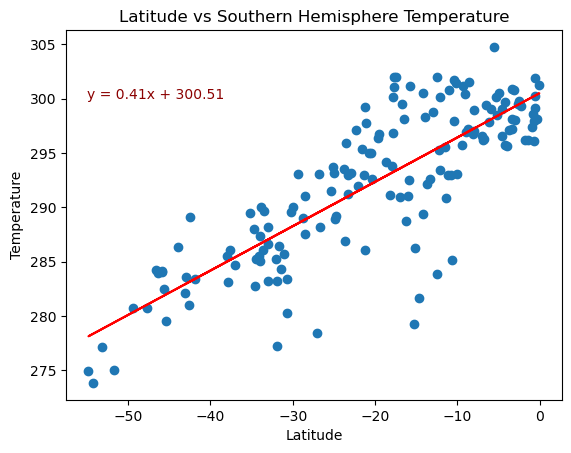

In [29]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

south_lat.reset_index(drop=True, inplace=True)
south_temp.reset_index(drop=True, inplace=True)

plot_linregress(south_lat, south_temp, "Temperature", "South", (-55, 300))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-squared: 2.1107740117130573e-05


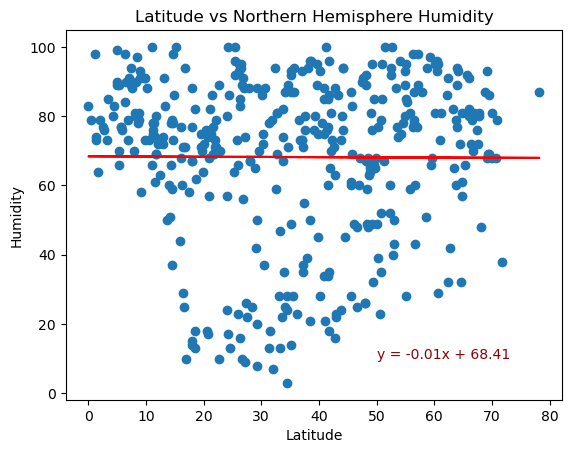

In [32]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]

north_lat.reset_index(drop=True, inplace=True)
north_hum.reset_index(drop=True, inplace=True)

plot_linregress(north_lat, north_hum, "Humidity", "North", (50, 10))

r-squared: 0.00014269235521401305


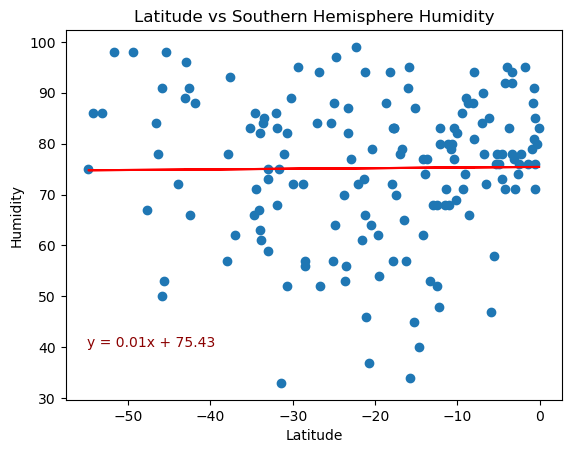

In [35]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]

south_lat.reset_index(drop=True, inplace=True)
south_hum.reset_index(drop=True, inplace=True)

plot_linregress(south_lat, south_hum, "Humidity", "South", (-55, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.0008031214012982966


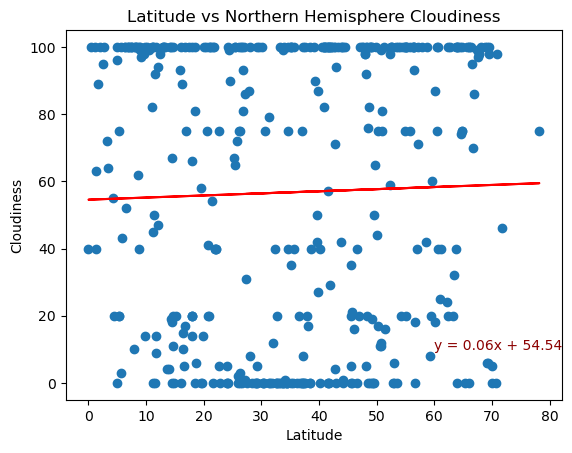

In [38]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]

north_lat.reset_index(drop=True, inplace=True)
north_cloud.reset_index(drop=True, inplace=True)

plot_linregress(north_lat, north_cloud, "Cloudiness", "North", (60, 10))

r-squared: 0.00020336458698365486


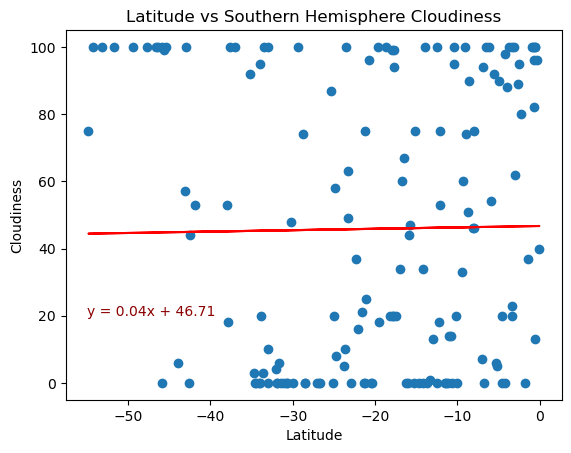

In [39]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]

south_lat.reset_index(drop=True, inplace=True)
south_cloud.reset_index(drop=True, inplace=True)

plot_linregress(south_lat, south_cloud, "Cloudiness", "South", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.0175820146281191


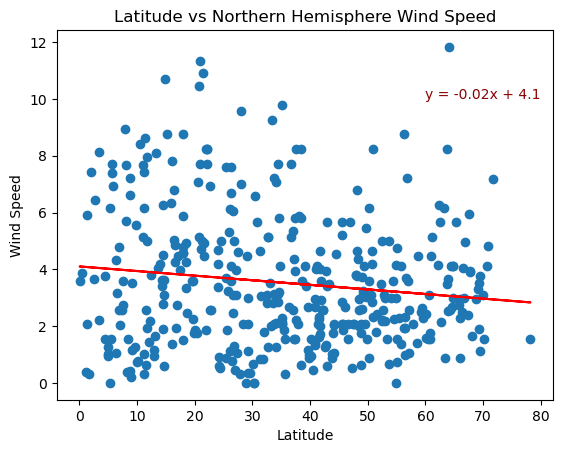

In [41]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]

north_lat.reset_index(drop=True, inplace=True)
north_wind.reset_index(drop=True, inplace=True)

plot_linregress(north_lat, north_wind, "Wind Speed", "North", (60, 10))

r-squared: 0.004095634178822962


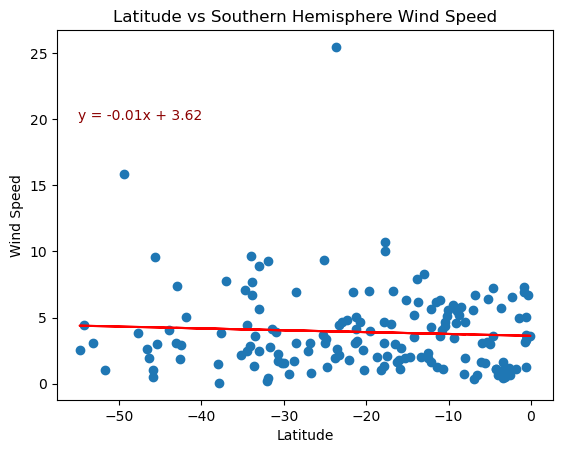

In [43]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Wind Speed"]

south_lat.reset_index(drop=True, inplace=True)
south_cloud.reset_index(drop=True, inplace=True)

plot_linregress(south_lat, south_cloud, "Wind Speed", "South", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE